In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
reeses = cv2.imread('C:/Users/jlang/Desktop/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
cereal = cv2.imread('C:/Users/jlang/Desktop/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)   

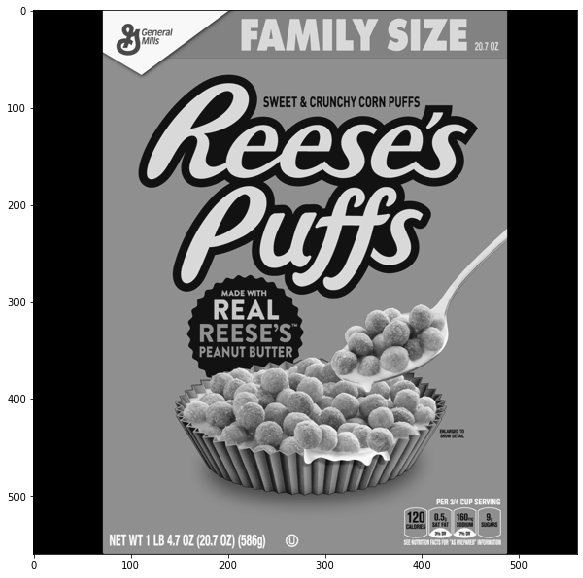

In [3]:
display(reeses)

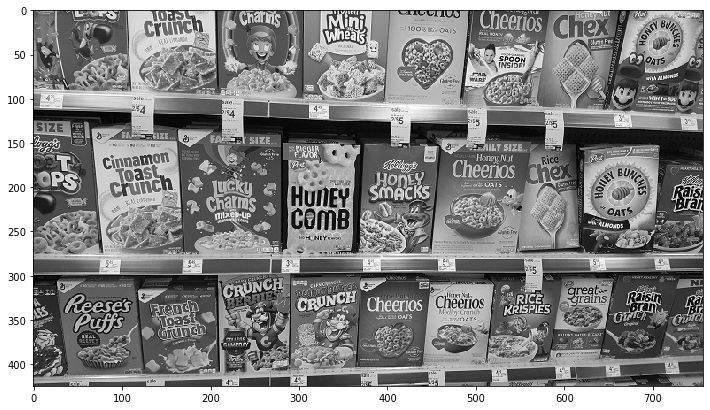

In [4]:
display(cereal)

In [5]:
orb = cv2.ORB_create()

In [6]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereal,None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [8]:
matches = bf.match(des1,des2)

In [9]:
matches = sorted(matches,key=lambda x:x.distance)

In [10]:
single_match = matches[0]

In [11]:
single_match.distance

44.0

In [12]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereal,kp2,matches[:25],None,flags=2)

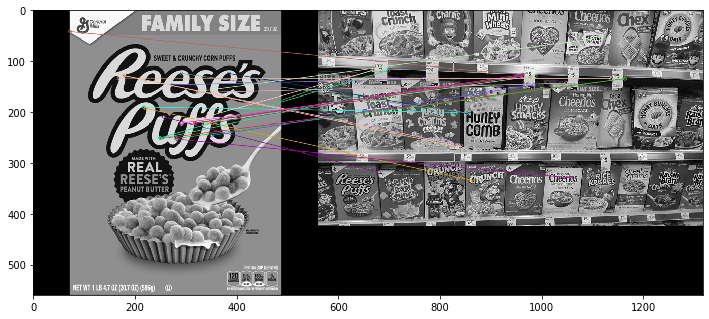

In [13]:
display(reeses_matches)

In [38]:
# Above has no connection to Reeses puffs on the store
# Must use opencv-contrib version 3.4.2.17 which has SIFT available
sift = cv2.xfeatures2d.SIFT_create()

In [39]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereal, None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
matches = bf.knnMatch(des1, des2, k=2)

In [36]:
#pairs the two best matches, could change parameters above
# Run below
#matches

In [24]:
# ratio test to hold good matches
good = []
# if match 1 istance less than 75% of the match 2 distance, then discriptor is a good match
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [37]:
# run below
#good

In [26]:
len(good)

78

In [27]:
len(matches)

1500

In [28]:
# we have a lot of poor matches, let us draw them
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereal, kp2, good, None, flags=2)

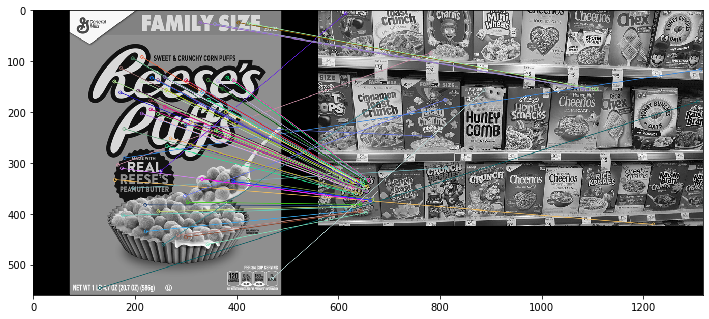

In [29]:
display(sift_matches)

In [40]:
sift = cv2.xfeatures2d.SIFT_create()

In [41]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereal, None)

# Add in FLAN
# Fast Library for Approximate Nearest Neighbors
# FLANN is faster than brute force, but approximates
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [42]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [43]:
matches = flann.knnMatch(des1, des2, k=2)

In [44]:
matchesMask = [[0,0] for i in range(len(matches))]

In [34]:
good1 = []

for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good1.append([match1])

In [45]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

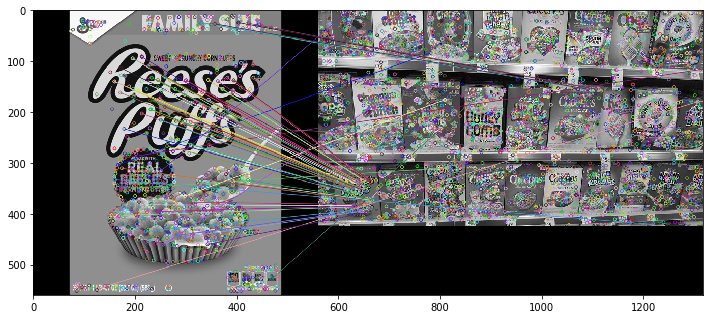

In [35]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,good,None,flags=0)
display(flann_matches)
# flags = 0 shows approximates and draws lines on the best
#flags = 2 only shows the lines drawn

In [46]:
# Better identification with concerned connects
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

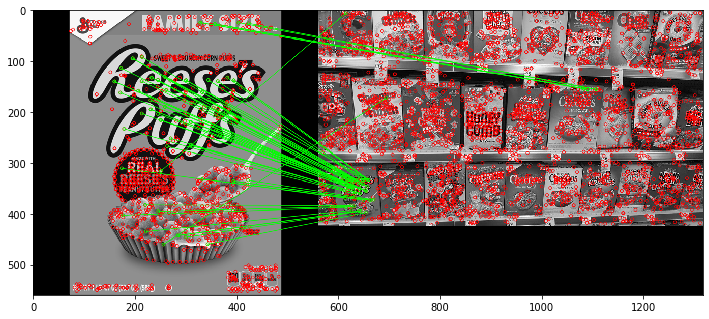

In [47]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,matches,None,**draw_params)
display(flann_matches)

In [53]:
draw_params = dict(matchColor = (0,0,255),
                  singlePointColor = (255,0,0),
                  matchesMask=matchesMask,
                  flags=2)

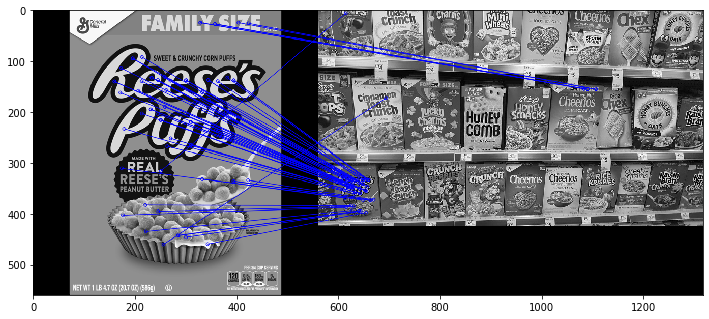

In [54]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,matches,None,**draw_params)
display(flann_matches)